In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
#import balck friday training dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [23]:
print(train_data.shape, test_data.shape)

(550068, 12) (233599, 11)


In [24]:
data = pd.concat([train_data, test_data])

In [25]:
data.shape

(783667, 12)

In [26]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [27]:
data.drop(['User_ID'], axis=1, inplace=True)

In [28]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [29]:
data['Gender'] = data['Gender'].map({'F':0, 'M':1})

In [30]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [35]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [40]:
#pd.get_dummies(data['Age'], drop_first=True, dtype='int')
#Instead of using hot encoding, we would perform target/ label encoding and provide some ranking for age

data['Age'] = data['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7})

In [41]:
data['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [42]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [50]:
# one hot encoding for city category
data = pd.get_dummies(data, columns=['City_Category'], drop_first = True, dtype ='int')
data.shape

(783667, 12)

In [79]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

# Observation: Significant missing values for product cateogry 2, product category 3.

In [61]:

#Replace with mode for missing values for these cateogrical values
data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0], inplace= True)

In [62]:
data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0], inplace= True)

In [65]:
data.shape

(783667, 12)

In [70]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [69]:
#clean up Stay_In_Current_City_Years and remove  '+'

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+', '')

In [72]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             783667 non-null  int32  
 11  City_Category_C             783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [80]:
sns.pairplot(data)

Error in callback <function _draw_all_if_interactive at 0x000001A3B95C6E80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A3D183A520> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='Age', ylabel='Purchase'>

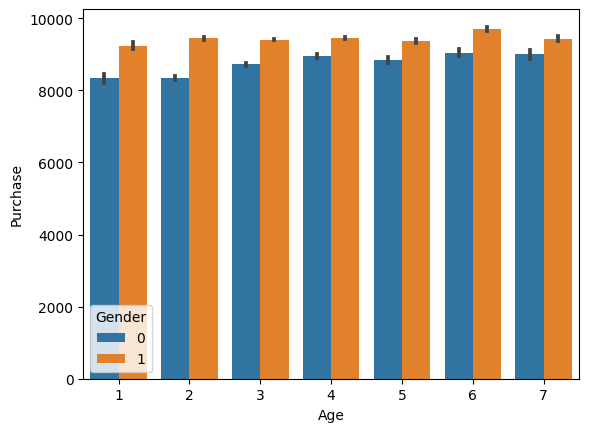

In [78]:
sns.barplot(x='Age', y='Purchase', hue ='Gender', data = data)

#Observation: Men are purchasing more than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

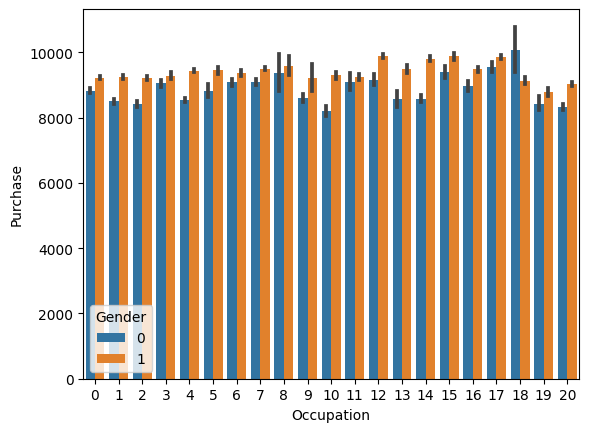

In [84]:
sns.barplot(x='Occupation', y='Purchase', hue ='Gender', data = data)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

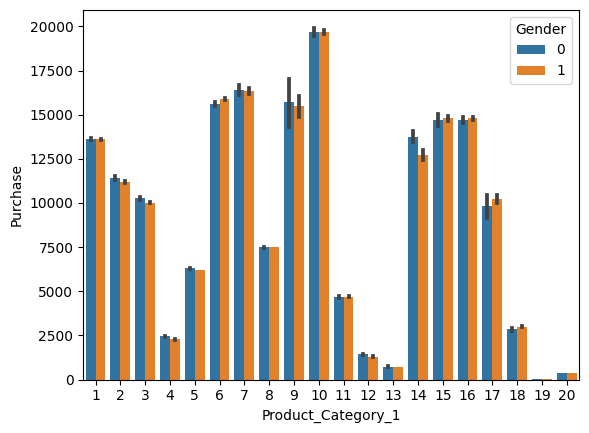

In [83]:
sns.barplot(x='Product_Category_1', y='Purchase', hue ='Gender', data = data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

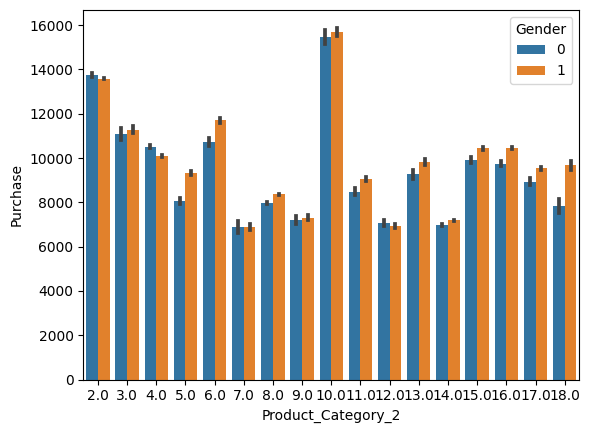

In [85]:
sns.barplot(x='Product_Category_2', y='Purchase', hue ='Gender', data = data)

In [86]:
data_test =  data[data['Purchase'].isnull()]
data_train = data[~data['Purchase'].isnull()]

In [97]:
X = data_train.drop('Purchase', axis =1)
y = data_train['Purchase']
print(X.shape, y.shape)

(550068, 11) (550068,)


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [101]:
data_train.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,3.496430,8.076707,1.858418,0.409653,5.404270,9.260768,14.989567,9263.968713,0.420263,0.311189
std,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,4.294093,2.739846,5023.065394,0.493601,0.462980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.000000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.000000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.000000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [ ]:
X_train.drop('Product_ID', inplace = True, axis=1)

In [114]:
X_test.drop('Product_ID', inplace = True, axis=1)

In [115]:

## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\anukatiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
